## Objective
The objective of this project is to develop a CNN deep learning model capable of accurately classifying images into different categories.

This report tracks the process of finetuning the hyperparameters in order to find the most optimal parameters that produces the most accurate results.

## Background
For the purpose of this project, the fashion MNIST dataset will be used to train the model. This dataset consists of 60,000 training images and 10,000 testing images. These images are of various items of fashion, which belong to one of ten categories; t-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, and ankle boot.

As the project requirements state that I can only use the Dense and Dropout layers, this will restrict the variety of models that I can come up with.

## Load the dataset

In [ ]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

## Data Exploration

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

The shapes of the training and test dataset shows that the training dataset consists of 60,000 images and the test dataset consists of 10,000 images. Each image is a matrix of 28 by 28 integers.
The datatype of the images is 8 bit unsigned integers.

## Establishing the baseline
The minimum requirement for the model is to perform better than the naive baseline.

As the dataset has 10 categories, the naive baseline accuracy would be 0.1.

## Data preprocessing

In [ ]:
# reshape and scale the data
# convert data type to floats
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

The dataset is reshaped and scaled so that it fits the target shape, as well as converting the data type to float.

In [ ]:
# encode labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Base model
The base model consists of the minimum number of layers.

In [ ]:
from keras import models
from keras import layers

base_model = models.Sequential()
base_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
base_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation
To compile the model, the optimizer used is rmsprop, the loss function is categorical entropy, and the metric used to measure the performance of the model is accuracy, as the models will be analysed on the basis of accuracy.

In [ ]:
base_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Model Training

In [ ]:
history=base_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.5629 - accuracy: 0.8031
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.3879 - accuracy: 0.8579
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.3400 - accuracy: 0.8752
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3128 - accuracy: 0.8840
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2952 - accuracy: 0.8901


In [ ]:
import matplotlib.pyplot as plt

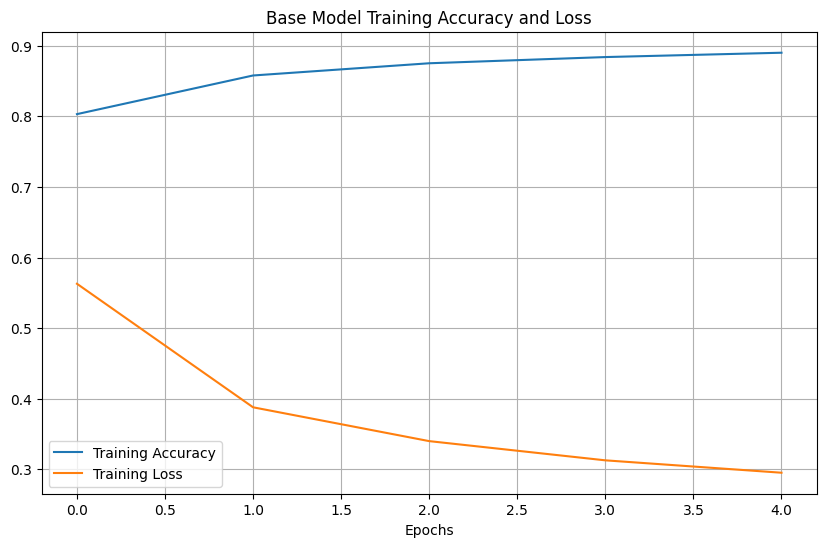

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Base Model Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

The accuracy of the model gradually increases with each epoch, with the accuracy of the last epoch being 0.89 (89%).

The decrease in loss is much more significant, starting with 0.563, and ending with 0.295.

## Model Validation

In [ ]:
base_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8424


[0.4181031286716461, 0.8424000144004822]

When testing the accuracy of the model on the test dataset, the accuracy drops from 0.89 to 0.87.
The loss also increases significantly from 0.29 at the last epoch to 0.36.

The drop in accuracy from the model training to the model testing is due to overfitting, which happens as machine learning models perform worse when new data is used.

# Second model
Add a new layer to the base model to increase accuracy.

In [ ]:
second_model = models.Sequential()
second_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
second_model.add(layers.Dense(10, activation='relu'))
second_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 407160 (1.55 MB)
Trainable params: 407160 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation

In [ ]:
second_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Model Training

In [ ]:
history=second_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7987 - accuracy: 0.7127
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4374 - accuracy: 0.8451
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3782 - accuracy: 0.8635
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3439 - accuracy: 0.8758
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3189 - accuracy: 0.8844


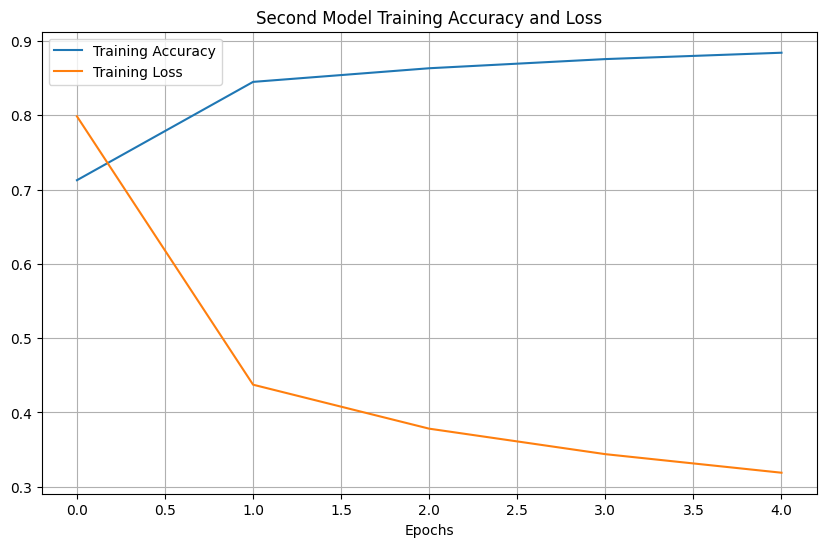

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Second Model Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

While the second model and the base model follow similar trajectories, the first epoch of the second model has a higher loss and lower accuracy compared to the first epoch of the base model. This continues for each epoch, resulting in the second model having a slightly worse score than the base model.

## Model Validation

In [ ]:
second_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3829 - accuracy: 0.8638


[0.3829007148742676, 0.8637999892234802]

While the first model had a loss of about 0.38 and an accuracy around 0.86, this model has a loss of 0.34 and an accuracy of 0.88.

Even though the model training for the second model showed slightly worse results than the base model, the results of the model validation exceeds that of the base model.

# Third model
As adding a new layer improved the model validation score, another layer will be added to attempt to further improve the accuracy.

In [ ]:
third_model = models.Sequential()
third_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
third_model.add(layers.Dense(10, activation='relu'))
third_model.add(layers.Dense(10, activation='relu'))
third_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
third_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 407270 (1.55 MB)
Trainable params: 407270 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation

In [ ]:
third_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Model Training

In [ ]:
history=third_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.8681 - accuracy: 0.6848
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4986 - accuracy: 0.8246
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4250 - accuracy: 0.8493
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3777 - accuracy: 0.8647
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3510 - accuracy: 0.8723


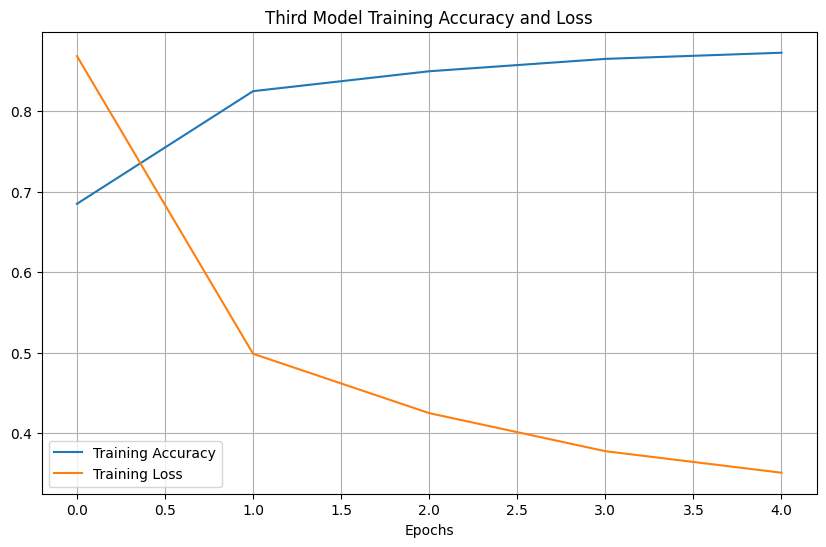

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Third Model Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

The first epoch shows a much higher loss of 0.868 compared to the first two models, although it quickly decreases to 0.351 at the fifth epoch, which is still higher than the losses of the previous models.

The accuracy of the first epoch is also lower than the previous models, at 0.685, and increases to 0.872 at the fifth epoch, which is still lower than the previous models.

## Model validation

In [ ]:
third_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8558


[0.41776660084724426, 0.8557999730110168]

Compared to the previous model, this model validation shows an increase in loss, from 0.349 to 0.379, although it is still less than the base model's loss of 0.383.

The model also has a decrease in accuracy, from 0.879 to 0.863, which is still higher than the base model's accuracy of 0.860.

Overall, this model validation shows that the third model scored worse than the second model, but still scored better than the base model. This may be due to the increasing number of layers resulting in overfitting.

# Fourth model
It is possible that the cause of the decrease in accuracy of the third model is due to overfitting; therefore, Dropout layers will be added to decrease the number of nodes to see if that can remedy the effect of adding another layer.

In [ ]:
fourth_model = models.Sequential()
fourth_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
fourth_model.add(layers.Dropout(0.1))
fourth_model.add(layers.Dense(10, activation='relu'))
fourth_model.add(layers.Dense(10, activation='relu'))
fourth_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
fourth_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 407270 (1.55 MB)
Trainable params: 407270 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation

In [ ]:
fourth_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Model Training

In [ ]:
history=fourth_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.9729 - accuracy: 0.6722
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4881 - accuracy: 0.8227
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4017 - accuracy: 0.8541
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3664 - accuracy: 0.8673
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3407 - accuracy: 0.8752


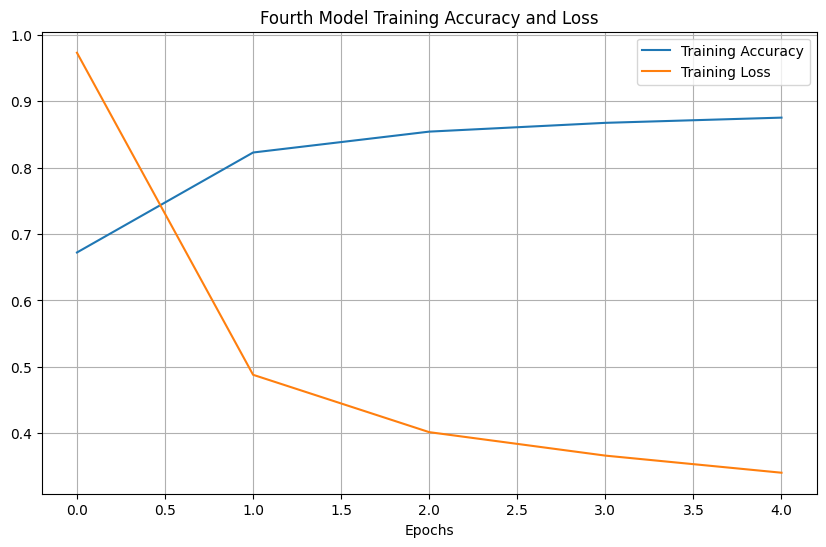

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Fourth Model Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

The loss at the first epoch is much higher than before, at 0.973, but quickly drops to 0.341 at the fifth epoch.

The accuracy at the last epoch is 0.875, which is slightly higher than the accuracy of the previous model, 0.872, but is still lower than the accuracy of the first two models.

## Model Validation

In [ ]:
fourth_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8664


[0.3823387920856476, 0.8664000034332275]

The results of the model validation are comparable to the previous ones.
The loss increased from 0.379 in the previous model to 0.382, while the accuracy is slightly better than the previous model, going from 0.862 to 0.866.

It appears that adding the Dropout layer resulted in an increase in loss, and while the accuracy increased, it was not a significant amount that makes up for the increase in loss.



# Evaluation
I successfully managed created four deep learning models, each with different combinations of Dense and Dropout layers and activations. All four of the model validations showed that all the models received accuracy scores higher than the naive baseline, which is 0.1.

An area I could have improved in is creating more models with differing parameters, or experimented with different activations for each models. I mainly focused on the number of Dense layers used.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Conclusion

After comparing the accuracy and loss scores of each model validation, it is clear that model most suited for accurately classifying the fashion MNIST dataset is the second model.

It consists of two layers, the first being a Dense layer with ReLU activation, and a second layer is a Dense with softmax activation.

The model validation showed that it has the highest accuracy of 0.864 (86.4%).

Although the main measure being analysed is the accuracy, the second model also received the second lowest loss of 0.383 (38.3%), the model with the lowest loss being the fourth model with a loss of 0.382 (38.2%), which is a negligible difference.

# References
Code for the base model is from DLWP chapter 2.